In [1]:
import numpy as np
import pandas as pd

import math

from scipy.stats import norm
from scipy.stats import laplace
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

In [2]:
word_labels = ["make", "address", "all", "3d", "our", "over", "remove", "internet",
                "order", "mail", "receive", "will", "people", "report", "addresses",
                "free", "business", "email", "you", "credit", "your", "font", "000",
                "money", "hp", "hpl", "george", "650", "lab", "labs", "telnet", "857",
                "data", "415", "85", "technology", "1999", "parts", "pm", "direct", "cs",
                "meeting", "original", "project", "re", "edu", "table", "conference", "char_freq1", "char_freq2", "char_freq3", 
              "char_freq4", "char_freq5", "char_freq6", "cap_run_length_avg", "cap_run_length_longest", "cap_run_length_total", "label"]
df = pd.read_csv("../spambase/spambase.data", names = word_labels, header=None) 
# df_norm = df.iloc[:, :-1]
# df_norm = (df_norm - df_norm.mean()) / df_norm.std()
# df = df_norm.join(df.iloc[:, -1])

In [3]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    index_list = df.index.tolist()
    test_indexes = random.sample(population=index_list, k=test_size)

    test_df = df.loc[test_indexes]
    train_df = df.drop(test_indexes)
    
    return train_df, test_df

In [4]:
df.iloc[1, :]

make                         0.210
address                      0.280
all                          0.500
3d                           0.000
our                          0.140
over                         0.280
remove                       0.210
internet                     0.070
order                        0.000
mail                         0.940
receive                      0.210
will                         0.790
people                       0.650
report                       0.210
addresses                    0.140
free                         0.140
business                     0.070
email                        0.280
you                          3.470
credit                       0.000
your                         1.590
font                         0.000
000                          0.430
money                        0.430
hp                           0.000
hpl                          0.000
george                       0.000
650                          0.000
lab                 

In [5]:
# test_df.head()

In [6]:
# from random import randrange
# def make_kfolds(df, kfolds):
#     data_folds = list()
#     df_list = df.values.tolist()
#     fold_size = int(len(df) / kfolds)
#     for i in range(kfolds):
#         fold = list()
#         while len(fold) < fold_size:
#             x = len(df_list);
#             index = randrange(x)
#             fold.append(df_list.pop(index))
#         data_folds.append(pd.DataFrame(fold))
#     return data_folds

from random import randrange
def make_kfolds(df, kfolds):
    data_folds = list()
    for i in range(kfolds):
        data_folds.append(pd.DataFrame())
    counter = 0
    for i in range(len(df)):
        if counter >= kfolds:
            counter = 0
        data_folds[counter] = data_folds[counter].append(df[i:i+1])
        counter += 1
    return data_folds

In [7]:
data_folds = make_kfolds(df, 10)

In [8]:
data_folds[1].head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,char_freq1,char_freq2,char_freq3,char_freq4,char_freq5,char_freq6,cap_run_length_avg,cap_run_length_longest,cap_run_length_total,label
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
11,0.00,0.00,0.25,0.0,0.38,0.25,0.25,0.00,0.00,0.00,...,0.022,0.044,0.000,0.663,0.000,0.000,1.243,11,184,1
21,0.05,0.07,0.10,0.0,0.76,0.05,0.15,0.02,0.55,0.00,...,0.042,0.101,0.016,0.250,0.046,0.059,2.569,66,2259,1
31,0.00,0.00,3.03,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.352,0.000,2.112,0.000,0.000,3.909,11,43,1
41,0.00,0.00,0.00,0.0,2.94,0.00,0.00,0.00,0.00,0.00,...,0.335,0.335,0.000,0.671,0.000,0.000,4.000,12,28,1


In [9]:
# X =train_df.iloc[:, :-1]
# y =train_df.iloc[:, -1]

In [10]:
# len(labels)

In [11]:
#labels = ['min_value', 'low-mean-value', 'overall-mean-value', 'high-mean-value', 'max-value']
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
for j in df.columns[:-1]:
    mean = df[j].mean()
    mean1_df = df.loc[df['label'] == 1][j].mean()
    mean2_df = df.loc[df['label'] == 0][j].mean()
    if(mean1_df < mean2_df):
        lo = mean1_df 
        hi = mean2_df
    else:
        lo = mean2_df
        hi = mean1_df
    bins = [-1*np.inf, lo/2, lo, (lo+mean)/2, mean, (mean+hi)/2, hi, hi*2, hi*4, np.inf]
    df[j] = df[j].replace(0,mean) 
    df[j] = pd.cut(df[j],bins,labels=labels)

In [12]:
def count(data,feature_name,label,target):
    cond = (data[feature_name] == label) & (data['label'] == target)
    return len(data[cond])

In [13]:
prob_dict = {0:{},1:{}}

In [14]:
random.seed(0)
train, test = train_test_split(df, 0.20)

train_X = train
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [15]:
cnt_label_0 = count(train_X,'label',0,0)
cnt_label_1 = count(train_X,'label',1,1)
    
probability0 = cnt_label_0/len(train_X)
probability1 = cnt_label_1/len(train_X)

In [16]:
cnt_label_1

1440

In [17]:
for col in train_X.columns[:-1]:
        prob_dict[0][col] = {}
        prob_dict[1][col] = {}
        
        for feature_cat in labels:
            cnt_cat_0 = count(train_X,col,feature_cat,0)
            cnt_cat_1 = count(train_X,col,feature_cat,1)
            
            prob_dict[0][col][feature_cat] = (cnt_cat_0 +1) / (cnt_label_0+9)
            prob_dict[1][col][feature_cat] = (cnt_cat_1+1) / (cnt_label_1+9)

In [18]:
prob_dict

{0: {'make': {'1': 0.004888888888888889,
   '2': 0.016,
   '3': 0.006666666666666667,
   '4': 0.8564444444444445,
   '5': 0.008444444444444444,
   '6': 0.004888888888888889,
   '7': 0.029333333333333333,
   '8': 0.033777777777777775,
   '9': 0.03955555555555555},
  'address': {'1': 0.012,
   '2': 0.011111111111111112,
   '3': 0.003111111111111111,
   '4': 0.9048888888888889,
   '5': 0.003111111111111111,
   '6': 0.0026666666666666666,
   '7': 0.02,
   '8': 0.009333333333333334,
   '9': 0.033777777777777775},
  'all': {'1': 0.01911111111111111,
   '2': 0.035111111111111114,
   '3': 0.017333333333333333,
   '4': 0.7368888888888889,
   '5': 0.01911111111111111,
   '6': 0.016888888888888887,
   '7': 0.07022222222222223,
   '8': 0.05644444444444444,
   '9': 0.028888888888888888},
  '3d': {'1': 0.00044444444444444447,
   '2': 0.00044444444444444447,
   '3': 0.00044444444444444447,
   '4': 0.9937777777777778,
   '5': 0.0008888888888888889,
   '6': 0.0017777777777777779,
   '7': 0.000888888888

In [19]:
y_pred = []

In [20]:
for i in range(0,len(test_X)):
        product0 = probability0
        product1 = probability1
        for column in test_X.columns:   #p of x give y
            product0 *= prob_dict[0][column][test_X[column].iloc[i]]
            product1 *= prob_dict[1][column][test_X[column].iloc[i]]
        
        #Predict the outcome
        if product0 > product1:
            y_pred.append(0)
        else:
            y_pred.append(1)


In [21]:
tp,tn,fp,fn = 0,0,0,0
for j in range(0,len(y_pred)):
    if y_pred[j] == 0:
        if test_y.iloc[j] == 0:
            tp += 1
        else:
            fp += 1
    else:
        if test_y.iloc[j] == 1:
            tn += 1
        else:
            fn += 1

In [22]:
accuracy = (tp + tn)/len(test_y)

In [23]:
print('Accuracy for training length ',((tp+tn)/len(test_y))*100)

Accuracy for training length  89.13043478260869


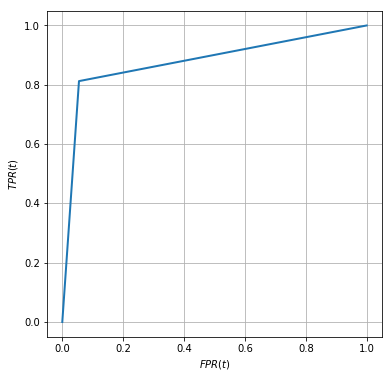

In [24]:
thresholds = np.linspace(2,-2,105)

ROC = np.zeros((105,2))

for i in range(105):
    t = thresholds[i]

    TP_t = np.logical_and( y_pred > t, test_y==1 ).sum()
    TN_t = np.logical_and( y_pred <=t, test_y==0 ).sum()
    FP_t = np.logical_and( y_pred > t, test_y==0 ).sum()
    FN_t = np.logical_and( y_pred <=t, test_y==1 ).sum()

    FPR_t = FP_t / float(FP_t + TN_t)
    ROC[i,0] = FPR_t

    TPR_t = TP_t / float(TP_t + FN_t)
    ROC[i,1] = TPR_t

# Plot the ROC curve.
fig = plt.figure(figsize=(6,6))
plt.plot(ROC[:,0], ROC[:,1], lw=2)
plt.xlabel('$FPR(t)$')
plt.ylabel('$TPR(t)$')
plt.grid()

In [25]:
AUC = 0.
for i in range(100):
    AUC += (ROC[i+1,0]-ROC[i,0]) * (ROC[i+1,1]+ROC[i,1])
AUC *= 0.5
AUC

0.8787439163656502